In [4]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


How many pokemons were introduced in each generation? 

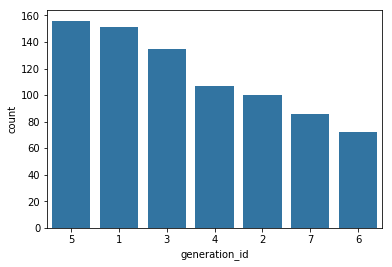

In [10]:
gen_order = pokemon.generation_id.value_counts().index
bar_color = sns.color_palette()[0]
sns.countplot(data = pokemon, x='generation_id', color = bar_color, order = gen_order);

How frequent is each offensive/defensive type? 

In [15]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


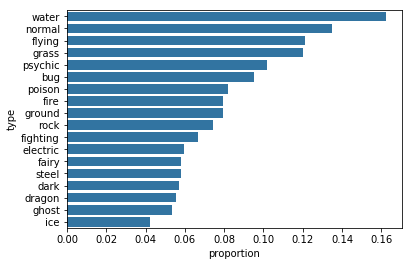

In [40]:
species_count = pkmn_types.species.nunique()
max_prop = pkmn_types.type.value_counts().max() / species_count

xticks = np.arange(0,max_prop, 0.02)
xticks_names = ['{:0.2f}'.format(v) for v in xticks]

type_order = pkmn_types.type.value_counts().index
sns.countplot(data = pkmn_types, y='type',color = bar_color, order = type_order);
plt.xticks(xticks*species_count,xticks_names);
plt.xlabel('proportion');